In [5]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import matplotlib
import matplotlib.pyplot as pyplot # for plotting


import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [2]:
train = pd.read_csv('train_modified.csv')
test = pd.read_csv('test_modified.csv')
train['target']=train['Disbursed']
train=train.drop('Disbursed',axis=1)
target = 'Disbursed'
IDcol = 'ID'

In [3]:
data=train.append(test)
data.head(2)

,Age,Device_Type_0,Device_Type_1,EMI_Loan_Submitted_Missing,Existing_EMI,Filled_Form_0,Filled_Form_1,Gender_0,Gender_1,ID,...,Var2_0,Var2_1,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Var4,Var5,target
0,37,0,1,1,0.0,1,0,1,0,ID000002C20,...,0,0,0,0,0,0,1,1,0,0.0
1,30,0,1,0,0.0,1,0,0,1,ID000004E40,...,0,0,0,0,0,0,1,3,13,0.0


In [55]:
xgb_param = alg.get_xgb_params()
evals_results = {}
model = xgb.train(xgb_params,xgtrain,num_boost_round=alg.get_params()['n_estimators'],evals=[(xgtrain, 'train'), (xgtest, 'eval')],
                 evals_result=evals_results)

[0]	train-error:0.014594	eval-error:0.014786
[1]	train-error:0.014611	eval-error:0.014633
[2]	train-error:0.014627	eval-error:0.014633
[3]	train-error:0.014545	eval-error:0.014633
[4]	train-error:0.014627	eval-error:0.014633
[5]	train-error:0.014627	eval-error:0.014633
[6]	train-error:0.014627	eval-error:0.014633
[7]	train-error:0.014627	eval-error:0.014633
[8]	train-error:0.014627	eval-error:0.014633
[9]	train-error:0.014627	eval-error:0.014633
[10]	train-error:0.014627	eval-error:0.014633
[11]	train-error:0.014627	eval-error:0.014633
[12]	train-error:0.014627	eval-error:0.014633
[13]	train-error:0.014627	eval-error:0.014633
[14]	train-error:0.014627	eval-error:0.014633
[15]	train-error:0.014627	eval-error:0.014633
[16]	train-error:0.014627	eval-error:0.014633
[17]	train-error:0.014627	eval-error:0.014633
[18]	train-error:0.014627	eval-error:0.014633
[19]	train-error:0.014627	eval-error:0.014633
[20]	train-error:0.014627	eval-error:0.014633
[21]	train-error:0.014627	eval-error:0.01463

In [53]:
alg,predictors,features=initModelPara(data,'target','ID')
X,Y,X_train,X_test,y_train,y_test=splitData(data,features)

In [56]:
#algo=modelFit(alg,X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eval_metric='auc', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=116, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)

In [54]:
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_train.values,label=y_train.values)
xgtest = xgb.DMatrix(X_test.values,label=y_test.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=3,
                      metrics='auc', early_stopping_rounds=50,verbose_eval=10)
alg.set_params(n_estimators=cvresult.shape[0])

[0]	train-auc:0.706551+0.0533464	test-auc:0.698884+0.0613894
[10]	train-auc:0.842069+0.0124739	test-auc:0.815318+0.00570522
[20]	train-auc:0.861449+0.0072809	test-auc:0.826153+0.00861479
[30]	train-auc:0.872652+0.00558335	test-auc:0.829587+0.0126279
[40]	train-auc:0.881764+0.00466646	test-auc:0.832552+0.0122772
[50]	train-auc:0.889356+0.00381174	test-auc:0.834952+0.0114179
[60]	train-auc:0.89504+0.00340792	test-auc:0.838545+0.0109525
[70]	train-auc:0.900909+0.00253236	test-auc:0.840822+0.0116796
[80]	train-auc:0.906568+0.00197153	test-auc:0.84311+0.0113983
[90]	train-auc:0.911098+0.00219329	test-auc:0.843788+0.012132
[100]	train-auc:0.916357+0.00186918	test-auc:0.844297+0.0118962
[110]	train-auc:0.921538+0.00136448	test-auc:0.844315+0.0112932
[120]	train-auc:0.926265+0.000913009	test-auc:0.844836+0.0105591
[130]	train-auc:0.930905+0.000387015	test-auc:0.843699+0.0104722
[140]	train-auc:0.934642+0.000595125	test-auc:0.842756+0.00960182
[150]	train-auc:0.938948+0.00100194	test-auc:0.8416

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eval_metric='auc', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=116, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)

In [78]:
def initModelPara(data,target,IDcol):
    target = target
    IDcol = IDcol
    predictors = [x for x in data.columns if x not in [IDcol]]
    features = [x for x in data.columns if x not in [IDcol,target]]

    alg = XGBClassifier(
     learning_rate =0.1,
     n_estimators=1000,
     max_depth=5,
     min_child_weight=1,
     gamma=0,
     eval_metric= 'auc',
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27)
    return alg,predictors,features

def splitData(data,features):
    X = data.loc[~data.target.isna(),features]
    Y = data[~data.target.isna()].target
    X_train, X_test, y_train, y_test = train_test_split( X, Y,test_size = 0.3, random_state = 100,stratify=Y)
    return X,Y,X_train,X_test,y_train,y_test

def prediction(alg,data):
    predictions = alg.predict(data)
    predprob = alg.predict_proba(data)[:,1]
    return predictions,predprob

def modelReport(data,predictions,predprob):
     
    print("Accuracy : %.4g" % metrics.accuracy_score(data, predictions))
    print("AUC Score (Test): %f" % metrics.roc_auc_score(data, predprob))
    
def modelFit(alg,X,Y):
    #Fit the algorithm on the data
    alg.fit(X, Y,eval_metric='auc')
    return alg

def modelPlots(cvresult,evals_results,model):
    # plot AUC from cvresult (lgb.cv)
    x_axis = range(0, len(cvresult['train-auc-mean']))
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, cvresult['train-auc-mean'], label='Train')
    ax.plot(x_axis, cvresult['test-auc-mean'], label='Test')
    ax.legend()
    pyplot.show()
    
    #plot AUC from train (lgb.train)
    x_axis = range(0, len(evals_results['train']['auc']))
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, evals_results['train']['auc'], label='Train')
    ax.plot(x_axis, evals_results['eval']['auc'], label='Test')
    ax.legend()
    pyplot.show()    
    
    xgb.plot_importance(model, importance_type="gain", title='gain',max_num_features=10,height=0.5)
    plt.show()

    #ROC c 
    #tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
    
#Testing using 2 methods namely lgb.cv method and lgb.train method 
def modelTest(alg,X_train,y_train,X_test,y_test,metric,early_stopping_rounds):
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(X_train.values,label=y_train.values)
    xgtest = xgb.DMatrix(X_test.values,label=y_test.values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=3,
                      metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=10)
    alg.set_params(n_estimators=cvresult.shape[0])
    
    xgb_param = alg.get_xgb_params()
    evals_results={}
    model = xgb.train(xgb_param,xgtrain,num_boost_round=alg.get_params()['n_estimators'],evals=[(xgtrain, 'train'), (xgtest, 'eval')],
                     evals_result=evals_results)
    algo=modelFit(alg,X_train,y_train)
    
    print("\nModel Report-Train")
    predictionTr,predprobTr=prediction(algo,X_train)
    modelReport(y_train,predictionTr,predprobTr)
    
    print("\nModel Report-Test")
    predictionTe,predprobTe=prediction(algo,X_test)
    modelReport(y_test,predictionTe,predprobTe)
    
    modelPlots(cvresult,evals_results,model)
    return alg
     
def modelPredict(data,alg,X,Y,features):
    alg=modelFit(alg,X,Y)
    #Predicting for the test set 
    testD=data.loc[data.target.isna(),features]
    testD['predprob'] = alg.predict_proba(testD)[:,1]
    testD.to_csv("Prediction.csv",index=False)       

[0]	train-auc:0.706551+0.0533464	test-auc:0.698884+0.0613894
[10]	train-auc:0.842069+0.0124739	test-auc:0.815318+0.00570522
[20]	train-auc:0.861449+0.0072809	test-auc:0.826153+0.00861479
[30]	train-auc:0.872652+0.00558335	test-auc:0.829587+0.0126279
[40]	train-auc:0.881764+0.00466646	test-auc:0.832552+0.0122772
[50]	train-auc:0.889356+0.00381174	test-auc:0.834952+0.0114179
[60]	train-auc:0.89504+0.00340792	test-auc:0.838545+0.0109525
[70]	train-auc:0.900909+0.00253236	test-auc:0.840822+0.0116796
[80]	train-auc:0.906568+0.00197153	test-auc:0.84311+0.0113983
[90]	train-auc:0.911098+0.00219329	test-auc:0.843788+0.012132
[100]	train-auc:0.916357+0.00186918	test-auc:0.844297+0.0118962
[110]	train-auc:0.921538+0.00136448	test-auc:0.844315+0.0112932
[120]	train-auc:0.926265+0.000913009	test-auc:0.844836+0.0105591
[130]	train-auc:0.930905+0.000387015	test-auc:0.843699+0.0104722
[140]	train-auc:0.934642+0.000595125	test-auc:0.842756+0.00960182
[150]	train-auc:0.938948+0.00100194	test-auc:0.8416

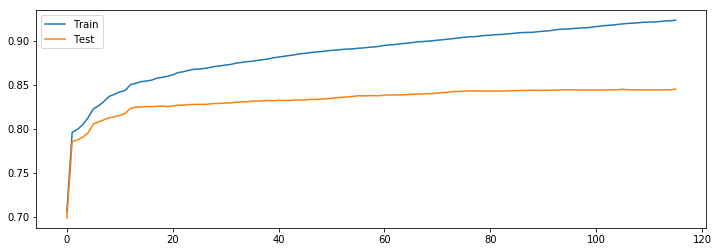

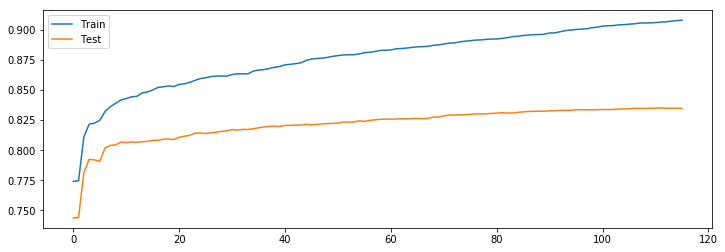

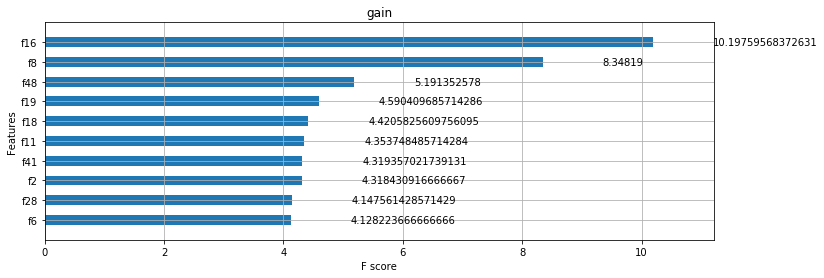

In [80]:
#Choose all predictors except target & IDcols
alg,predictors,features=initModelPara(data,'target','ID')
X,Y,X_train,X_test,y_train,y_test=splitData(data,features)
alg =modelTest(alg,X_train,y_train,X_test,y_test,'auc',50)
modelPredict(data,alg,X,Y,features)

In [74]:
evals_results

{'eval': {'error': [0.014786,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014633,
   0.014